In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from tensorflow.python.data import Dataset
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Dropout

Using TensorFlow backend.


In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows =10
pd.options.display.float_format = '{:.2f}'.format
cover_df = pd.read_csv('covtype.csv', sep = ',')
cover_df = cover_df.reindex(np.random.permutation(cover_df.index))
cover_df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
196535,3316,54,8,270,17,4260,225,223,131,1358,...,0,0,0,0,0,0,0,0,0,1
61680,3168,80,4,360,-6,3799,225,232,142,4451,...,0,0,0,0,0,0,0,0,0,1
74881,2959,238,14,474,59,5609,193,251,194,5285,...,0,0,0,0,0,0,0,0,0,2
235447,2009,301,19,0,0,60,163,228,204,792,...,0,0,0,0,0,0,0,0,0,3
170674,3101,93,15,228,32,4272,242,215,99,3416,...,0,0,0,0,0,0,0,0,0,1


In [0]:
cover_df.dtypes

Elevation                           int64
Aspect                              int64
Slope                               int64
Horizontal_Distance_To_Hydrology    int64
Vertical_Distance_To_Hydrology      int64
                                    ...  
Soil_Type37                         int64
Soil_Type38                         int64
Soil_Type39                         int64
Soil_Type40                         int64
Cover_Type                          int64
Length: 55, dtype: object

In [0]:
def preprocess(cover_df):
  select_features = cover_df[['Elevation','Aspect','Slope', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',	'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2',	'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24','Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',	'Soil_Type29', 'Soil_Type30',	'Soil_Type31', 'Soil_Type32',	'Soil_Type33', 	'Soil_Type34', 'Soil_Type35',	'Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40']]
  process_features = select_features
  return process_features

def preprocess_target(cover_df):
  output_targets = cover_df[['Cover_Type']]
  output_targets = cover_df['Cover_Type'].astype('category')
  return output_targets

In [0]:
#Training Data
training_sample = preprocess(cover_df.head(406700))
training_target = preprocess_target(cover_df.head(406700))

#Validation Data
validation_sample = preprocess(cover_df.tail(174312))
validation_target = preprocess_target(cover_df.tail(174312))

print ("Training example summary:")
display.display(training_sample.describe())

print('Validation example summary: ')
display.display(validation_sample.describe())

print('Training target summary:')
display.display(training_target.describe())

print ('Validation Target summary:')
display.display(validation_target.describe())


Training example summary:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,...,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00,406700.00
mean,2959.36,155.65,14.11,269.56,46.44,2352.31,212.14,223.32,142.53,1980.40,...,0.04,0.09,0.08,0.00,0.00,0.00,0.00,0.03,0.02,0.01
std,279.74,111.88,7.49,212.64,58.29,1560.23,26.78,19.77,38.26,1323.52,...,0.21,0.29,0.27,0.05,0.06,0.01,0.02,0.16,0.15,0.12
min,1859.00,0.00,0.00,0.00,-173.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2809.00,58.00,9.00,108.00,7.00,1106.00,198.00,213.00,119.00,1025.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2995.00,127.00,13.00,218.00,30.00,2001.00,218.00,226.00,143.00,1710.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3163.00,260.00,18.00,384.00,69.00,3330.00,231.00,237.00,168.00,2550.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,3857.00,360.00,65.00,1390.00,601.00,7117.00,254.00,254.00,254.00,7173.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Validation example summary: 


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,...,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00,174312.00
mean,2959.37,155.67,14.09,269.13,46.37,2345.10,212.16,223.32,142.52,1980.04,...,0.04,0.09,0.08,0.00,0.00,0.00,0.00,0.03,0.02,0.02
std,280.56,112.00,7.49,212.34,58.31,1556.96,26.74,19.75,38.30,1325.78,...,0.21,0.29,0.27,0.05,0.06,0.01,0.02,0.16,0.15,0.12
min,1861.00,0.00,0.00,0.00,-164.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2809.00,58.00,9.00,108.00,7.00,1104.00,198.00,213.00,119.00,1020.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2997.00,127.00,13.00,218.00,29.00,1989.00,218.00,226.00,143.00,1710.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3163.00,261.00,18.00,384.00,69.00,3322.00,231.00,237.00,168.00,2552.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,3858.00,360.00,66.00,1397.00,599.00,7116.00,254.00,254.00,254.00,7140.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Training target summary:


count     406700
unique         7
top            2
freq      198317
Name: Cover_Type, dtype: int64

Validation Target summary:


count     174312
unique         7
top            2
freq       84984
Name: Cover_Type, dtype: int64

In [0]:
# Now this is where Keras the mighty comes in

model = keras.Sequential([
    keras.layers.Dense(64, activation = tf.nn.relu,
                      input_shape = (training_sample.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation=tf.nn.softmax)
])
optimizer_a = keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = optimizer_a,
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                3520      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 520       
Total para

In [0]:


#To check whether our model runs
class Dot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0 : print('')
    print ('.', end='')
    
set_epoch = 100
tf.set_random_seed(1)

# Store training stats
fitting = model.fit(training_sample, training_target, epochs = set_epoch, batch_size = 60,
                   validation_split =0.2, verbose = 0,
                   callbacks=[Dot()])


....................................................................................................

In [0]:
print(fitting.history)

{'val_loss': [0.6442405593491961, 0.6836811587093561, 0.6893082773887703, 0.6755130121492184, 0.6510794794043598, 0.6696238861876563, 0.700922886848098, 0.6786649237401309, 0.6850969658118957, 0.6548414815034976, 0.6571979398424924, 0.6567913782312268, 0.6535297171882543, 0.6952485020004738, 0.6414510144380143, 0.6999067618640541, 0.6632077703685235, 0.6674635776480967, 0.6932033031028408, 0.6577667796497472, 0.6783149491474381, 0.6664097863243755, 0.6846737962171255, 0.694359047907648, 0.6616838299762068, 0.6767895316459167, 0.6576089974861928, 0.7004965769078006, 0.6406812280570373, 0.6613296380361351, 0.6458776724596471, 0.6496220196322255, 0.6566548285186511, 0.6488882498451554, 0.6894392555546109, 0.6559461349347079, 0.6951322988177624, 0.6881979886806067, 0.6461930315999279, 0.6577131735302466, 0.651117745798813, 0.6383879499746712, 0.6442737635696787, 0.6422868405377393, 0.6446928445672062, 0.6405882979746618, 0.6536929438044992, 0.6646419171109257, 0.6999715136344409, 0.6395836

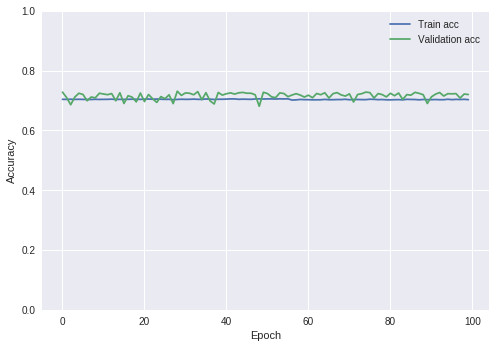

In [0]:
#Plotting the model

import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']), label = 'Train acc')
  plt.plot(history.epoch, np.array(history.history['val_acc']), label = 'Validation acc')
  plt.legend()
  plt.ylim([0,1])
plot_history(fitting)

#**Brief Description of Improvements made:**


*  In the previous submission the accuracy obtained was around 40%, Employing a few changes to the model an accuracy close to 70 % was attained
*  This was achieved by employing batch normalisation added after the dense layers
*  Additionally dropout layers were added for regularisation.
*  I also increased the epochs to 100. However this did not make much difference. Since the results were similar when the epochs were 25.










